In [1]:
import pandas as pd
import gnt
import gpplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import statsmodels as sm
from plotnine import *
import plotnine

In [2]:
gpplot.set_aesthetics(context = 'paper')

In [3]:
lfcs = pd.read_csv('../data/interim/FASN_avg_lfcs.csv')
qgis = pd.read_csv('../data/external/moffat_hap1_qgi.csv', header=1)
coessentiality_cors = pd.read_csv('../data/processed/coessentiality_correlations.csv')

In [4]:
control_genes = ['CXorf66', 'GPX6', 'BMP15', 'RXFP3', 'PRSS37', 'TSSK1B', 'SLC36A3', 'C3orf30',
                 'NDST4', 'RNF17', 'OPN5', 'RAX', 'GSX2', 'GLRA2', 'PPP3R2']

In [5]:
guide_residuals, model_info = gnt.get_guide_residuals(lfcs, control_genes, model='linear')

/Users/pdeweird/.local/share/virtualenvs/hart_lipid_metabolism-R5k7HHRA/lib/python3.8/site-packages/gnt/score.py:566: UserWarning: There are 28 guides without control pairs:
                         guide     gene
1880   ACAGATGCCACCTCAGTATGGAC   ARID1B
2044   ACAGGAACAGATCATTACCTGTA  NCKAP1L
8548   ACTCGGAGTTACCTGGACTTGAT  NCKAP1L
8692   ACTGGAGCCAACCAAGTGTTGTG    DMXL1
8836   AGAACCAAAGCAACCGTGGAACT  SMARCA2
9544   AGCGACGGCGTAACAAACTGGGG     MCL1
14228  AGTGCACATGATCTCACAAAATG    STAG1
15128  ATCATTGTCAAAGTGGGAGCACA   PPP3R2
16744  ATGGAACACAGGGCCCAAATGGC    BMP15
18564  CAATACACCCTGTAGATGGTACC    DMXL2
19308  CAGATCTACAATAAGCACACCAT    RNF17
20236  CAGCAACAGCTTGCACAACTACA   NCKAP1
26212  CCCCATCCCGGAAGAGTTCATTC   BCL2L1
27328  CCGGACAAGTTGCTGGGCCGCGA    RXFP3
41164  GCCTGATTCTTGCATCATATCCT    GLRA2
45788  TGGTCAACGAGGCCATACAATCT  C3orf30
47748  GCCGAGACCGTGTCTCTGCACCC   ARID1A
48548  GGTGCTTCTGGTCCGAACAGAAC  SMARCA2
48552  GGTTATATGTCACCACACCCATC  SMARCA2
54704  GAGTGGCTGGTGTCCCTGT

In [6]:
gene_residuals = gnt.get_gene_residuals(guide_residuals, 'residual_z')

In [7]:
gene_residuals.sort_values('pair_z_score').head(50)

,condition,gene_a,gene_b,lfc,base_lfc_a,base_lfc_b,guide_pairs,pair_z_score_gene_a_anchor,pair_z_score_gene_b_anchor,pair_z_score
3184,MOLM13_21,TP53,TP53,2.457662,2.269534,2.269534,3,-18.072428,-18.072428,-25.558272
1526,MOLM13_14,TP53,TP53,2.109569,1.850247,1.850247,3,-16.979359,-16.979359,-24.012439
5847,NOMO-1_21,PTEN,PTEN,1.461160,1.563361,1.563361,3,-13.437149,-13.437149,-19.002998
4189,NOMO-1_14,PTEN,PTEN,1.042600,1.011047,1.011047,3,-11.125185,-11.125185,-15.733388
1376,MOLM13_14,SREBF1,SREBF2,-1.209203,0.091368,-0.387536,9,-8.191314,-4.737172,-9.141820
161,MOLM13_14,ACACA,GPAT4,-1.435791,-0.668593,0.265907,9,-6.192930,-6.654478,-9.084490
1819,MOLM13_21,ACACA,GPAT4,-2.042092,-1.223785,0.801958,9,-6.525827,-6.247234,-9.031918
3034,MOLM13_21,SREBF1,SREBF2,-1.991637,0.044421,-0.831002,9,-8.317423,-4.342337,-8.951802
1248,MOLM13_14,ACACA,SQLE,-2.034572,-0.668593,-0.378877,9,-6.862464,-5.242298,-8.559359
1962,MOLM13_21,C12orf49,LDLR,-3.039035,-0.442027,-1.825171,9,-6.125424,-5.736774,-8.387840


## Example pair

In [8]:
guide_residuals[guide_residuals.anchor_gene == 'SREBF1'].sort_values('residual_z').head(6)

,anchor_guide,target_guide,anchor_gene,target_gene,condition,lfc,lfc_target,prediction,residual,residual_z
74744,TCCCCTGGGCCTGGTATCAAGGA,GAAGAACAGCGTGGCTCCAGGGT,SREBF1,CDIPT,MOLM13_21,-4.874166,-2.474755,-2.162739,-2.711427,-6.003734
74439,TCCCCTGGGCCTGGTATCAAGGA,GAAGAACAGCGTGGCTCCAGGGT,SREBF1,CDIPT,MOLM13_14,-3.287657,-1.790465,-1.557038,-1.730619,-5.248435
64183,GGCCCACAGAATCTCTGAAGGAT,CACAGGCCCCACATCAAGACCAT,SREBF1,PGD,MOLM13_14,-4.396441,-3.052252,-2.663361,-1.733080,-4.530677
74948,TCCCCTGGGCCTGGTATCAAGGA,ATGTTCACCCCAGATACCATCAG,SREBF1,IDI1,NOMO-1_14,-2.434174,-1.790538,-1.485331,-0.948843,-4.233484
64488,GGCCCACAGAATCTCTGAAGGAT,CACAGGCCCCACATCAAGACCAT,SREBF1,PGD,MOLM13_21,-5.310390,-3.352154,-2.970397,-2.339993,-4.170003
74741,TCCCCTGGGCCTGGTATCAAGGA,CTTGGCACCCACCTTGGCGTCTG,SREBF1,SREBF2,MOLM13_21,-2.356503,-0.807477,-0.539367,-1.817136,-4.023565


In [9]:
example_data = guide_residuals[(guide_residuals.anchor_gene == 'SREBF1') & 
                               (guide_residuals.condition == 'MOLM13_21')].copy()
example_data['guide_num'] = (example_data
                             .groupby('target_gene')
                             .cumcount() + 1)
example_data['label'] = example_data['anchor_gene'] + ' sg + ' + example_data['target_gene'] + ' sg' + example_data['guide_num'].astype(str)

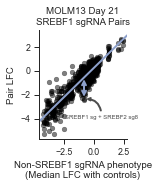

In [10]:
fig, ax = plt.subplots(figsize = (2, 2))
ax = sns.scatterplot(data=example_data, x='lfc_target', y='lfc', color='black', 
                     edgecolor=None, alpha=0.5, rasterized = True, ax=ax)
plt.title('MOLM13 Day 21\nSREBF1 sgRNA Pairs')
plt.gca().set_aspect('equal', adjustable='box')
sns.regplot(data=example_data, x='lfc_target', y='lfc', scatter=False, 
            color = gpplot.discrete_palette()[2], truncate=False, ci=None, 
            line_kws={'lw': 2})
label_point = example_data[example_data['label'] == 'SREBF1 sg + SREBF2 sg8']
label_coords = (label_point['lfc_target'].values[0], label_point['lfc'].values[0])
plt.annotate(label_point['label'].values[0], xy=label_coords,  xycoords='data',
            xytext=(0.3, 0.2), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", color="0.3",
                            connectionstyle="angle3,angleA=90,angleB=0", lw=2),
            horizontalalignment='left', verticalalignment='center', 
            color='0.3', size = 6)
plt.annotate('', xy=label_coords, xycoords='data', 
             xytext=label_point[['lfc_target', 'prediction']].squeeze().to_list(), textcoords='data', 
             arrowprops=dict(arrowstyle='<->', color=gpplot.discrete_palette()[2], lw=2))
sns.despine()
plt.xlabel('Non-SREBF1 sgRNA phenotype\n(Median LFC with controls)')
plt.ylabel('Pair LFC')
gpplot.savefig('../figures/SRBF1_example.pdf', dpi = 300)


## Comparison between conditions

In [11]:
spread_gene_residuals = (gene_residuals.pivot_table(index=['gene_a', 'gene_b', 'guide_pairs'], 
                                                    values='pair_z_score', 
                                                    columns='condition')
                         .reset_index())
spread_gene_residuals

condition,gene_a,gene_b,guide_pairs,MOLM13_14,MOLM13_21,NOMO-1_14,NOMO-1_21
0,ACACA,ACACA,3,1.217641,2.358908,0.537587,1.068172
1,ACACA,ACACB,9,-1.750365,-0.963393,-2.246605,-0.850961
2,ACACA,ACAT1,9,-2.114614,-0.565041,-2.003848,-2.598202
3,ACACA,ACLY,9,8.076119,7.067788,0.290607,2.906988
4,ACACA,ACO1,9,0.569401,0.977927,0.040481,0.127335
...,...,...,...,...,...,...,...
1653,TP53,TSC1,9,3.389994,3.945875,-1.595510,-0.771231
1654,TP53,TSSK1B,3,-0.853500,-0.395401,0.250204,0.617777
1655,TP53,UBE2G2,9,-0.031335,0.208560,-0.215405,-0.726451
1656,TSC1,TSSK1B,3,0.922829,0.112526,1.113407,0.661346


In [12]:
spread_gene_residuals['gene_pair'] = spread_gene_residuals['gene_a'] + '_' + spread_gene_residuals['gene_b']

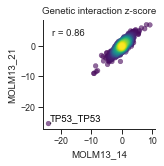

In [13]:
fig, ax = plt.subplots(figsize = (2,2))
ax = gpplot.point_densityplot(spread_gene_residuals, "MOLM13_14", "MOLM13_21", ax = ax)
gpplot.add_correlation(spread_gene_residuals, "MOLM13_14", "MOLM13_21")
gpplot.label_points(spread_gene_residuals, "MOLM13_14", "MOLM13_21", ['TP53_TP53'], 'gene_pair', 
                    color = 'black')
plt.title('Genetic interaction z-score')
sns.despine()
gpplot.savefig('../figures/MOLM13_correlation.pdf', dpi=300)

In [14]:
top_n = 2
no_same_gene_spread = spread_gene_residuals[spread_gene_residuals.gene_a != spread_gene_residuals.gene_b]
top_MOLM13 = no_same_gene_spread[no_same_gene_spread.MOLM13_21.abs().rank(ascending=False) <= top_n]
top_MOLM13

condition,gene_a,gene_b,guide_pairs,MOLM13_14,MOLM13_21,NOMO-1_14,NOMO-1_21,gene_pair
33,ACACA,GPAT4,9,-9.08449,-9.031918,-0.296472,0.172231,ACACA_GPAT4
1636,SREBF1,SREBF2,9,-9.14182,-8.951802,-1.537952,-3.995236,SREBF1_SREBF2


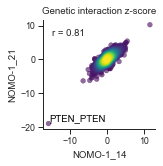

In [15]:
fig, ax = plt.subplots(figsize = (2,2))
ax = gpplot.point_densityplot(spread_gene_residuals, "NOMO-1_14", "NOMO-1_21", ax = ax)
gpplot.add_correlation(spread_gene_residuals, "NOMO-1_14", "NOMO-1_21")
gpplot.label_points(spread_gene_residuals, "NOMO-1_14", "NOMO-1_21", ['PTEN_PTEN'], 'gene_pair', 
                    color = 'black')
plt.title('Genetic interaction z-score')
sns.despine()
gpplot.savefig('../figures/NOMO_correlation.pdf', dpi=300)

In [16]:
top_NOMO1 = no_same_gene_spread[no_same_gene_spread['NOMO-1_21'].abs().rank(ascending=False) <= top_n]
top_NOMO1

condition,gene_a,gene_b,guide_pairs,MOLM13_14,MOLM13_21,NOMO-1_14,NOMO-1_21,gene_pair
274,C12orf49,LDLR,9,-8.354652,-8.387840,-4.649815,-6.239835,C12orf49_LDLR
1530,PTEN,TSC1,9,-3.365655,-2.762963,-2.782956,-5.878103,PTEN_TSC1


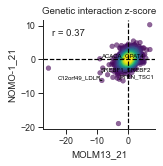

In [17]:
fig, ax = plt.subplots(figsize = (2,2))
ax = gpplot.point_densityplot(spread_gene_residuals, "MOLM13_21", "NOMO-1_21", ax = ax)
gpplot.add_correlation(spread_gene_residuals, "MOLM13_21", "NOMO-1_21")
gpplot.label_points(spread_gene_residuals, "MOLM13_21", "NOMO-1_21", 
                    set(top_NOMO1.gene_pair.to_list() + top_MOLM13.gene_pair.to_list()), 'gene_pair', 
                    color='black', size=6)
plt.axvline(x=0, linestyle='dashed', color='black')
plt.axhline(y=0, linestyle='dashed', color='black')
plt.title('Genetic interaction z-score')
sns.despine()
gpplot.savefig('../figures/NOMO_MOLM13_correlation.pdf', dpi=300)

## Comparison with HAP1 single cell clones

In [18]:
melted_qgis = (qgis
                  .rename({'FASN_merge': 'FASN'}, axis = 1)
                  .drop(['qGI_FASN_a', 'qGI_FASN_b', 'qGI_FASN_c'], axis = 1)
                  .melt(id_vars = 'gene', var_name='gene2', value_name='qgi'))
melted_qgis = (gnt.score.order_cols(melted_qgis, [0, 1], 'gene')
                 .drop(['gene', 'gene2'], axis=1))
melted_qgis['gene_pair'] = melted_qgis['gene_a'] + '_' + melted_qgis['gene_b'] 

In [19]:
melted_qgis

,qgi,gene_a,gene_b,gene_pair
0,0.432775,FASN,PFAS,FASN_PFAS
1,-0.139241,FASN,PGAP2,FASN_PGAP2
2,-1.538097,C12orf49,FASN,C12orf49_FASN
3,-1.240867,FASN,MOGS,FASN_MOGS
4,-0.882196,FASN,MBTD1,FASN_MBTD1
...,...,...,...,...
106819,-0.071744,C12orf49,INTS1,C12orf49_INTS1
106820,-0.522257,C12orf49,ELOF1,C12orf49_ELOF1
106821,0.395067,C12orf49,CENPM,C12orf49_CENPM
106822,-0.079756,C12orf49,IER3IP1,C12orf49_IER3IP1


In [20]:
joined_qgis = melted_qgis.merge(spread_gene_residuals, how='inner', on = ['gene_a', 'gene_b', 'gene_pair'])

In [21]:
top_qgis = joined_qgis[joined_qgis.qgi.abs().rank(ascending=False) <= 3]
top_qgis

,qgi,gene_a,gene_b,gene_pair,guide_pairs,MOLM13_14,MOLM13_21,NOMO-1_14,NOMO-1_21
25,-1.716321,FASN,LDLR,FASN_LDLR,9,-1.494803,-1.301402,0.994388,1.972556
233,-1.943931,SREBF1,SREBF2,SREBF1_SREBF2,9,-9.141820,-8.951802,-1.537952,-3.995236
234,-2.184946,SREBF1,SREBF2,SREBF1_SREBF2,9,-9.141820,-8.951802,-1.537952,-3.995236


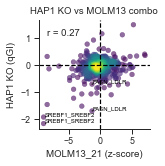

In [22]:
fig, ax = plt.subplots(figsize = (2,2))
plt.axvline(x=0, linestyle='dashed', color='black')
plt.axhline(y=0, linestyle='dashed', color='black')
ax = gpplot.point_densityplot(joined_qgis, "MOLM13_21", "qgi", ax = ax)
ax = gpplot.add_correlation(joined_qgis, "MOLM13_21", "qgi")
ax = gpplot.label_points(joined_qgis, "MOLM13_21", "qgi",  
                         set(top_qgis.gene_pair.to_list() + top_MOLM13.gene_pair.to_list()), 
                         "gene_pair", color = 'black', size=6)
plt.ylabel('HAP1 KO (qGI)')
plt.xlabel('MOLM13_21 (z-score)')
plt.title('HAP1 KO vs MOLM13 combo')
sns.despine()
gpplot.savefig('../figures/MOLM13_qgi_correlation.pdf', dpi=300)

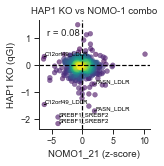

In [23]:
fig, ax = plt.subplots(figsize = (2,2))
plt.axvline(x=0, linestyle='dashed', color='black')
plt.axhline(y=0, linestyle='dashed', color='black')
ax = gpplot.point_densityplot(joined_qgis, "NOMO-1_21", "qgi", ax = ax)
ax = gpplot.add_correlation(joined_qgis, "NOMO-1_21", "qgi")
ax = gpplot.label_points(joined_qgis, "NOMO-1_21", "qgi",  
                         set(top_qgis.gene_pair.to_list() + top_NOMO1.gene_pair.to_list()), 
                         "gene_pair", color = 'black', size=6)
plt.ylabel('HAP1 KO (qGI)')
plt.xlabel('NOMO1_21 (z-score)')
plt.title('HAP1 KO vs NOMO-1 combo')
sns.despine()
gpplot.savefig('../figures/NOMO1_qgi_correlation.pdf', dpi=300)

## Coessentiality enrichment

In [24]:
gene_residuals['p_value'] = scipy.stats.norm.sf(abs(gene_residuals.pair_z_score))*2
gene_residuals['fdr_bh'] = (gene_residuals.groupby('condition')
                            .p_value
                            .transform(lambda x: sm.stats.multitest.multipletests(x, method='fdr_bh')[1]))

In [25]:
def get_hit_enrichment(gene_scores, coessentiality_cors, cutoff=1e-2, score='fdr_bh_all', 
                       fdr_range = range(-6,1)):
    merged_coess = gene_scores.merge(coessentiality_cors, how='left', on=['gene_a', 'gene_b'])
    merged_coess['coessential'] = merged_coess[score] <= cutoff
    fdr_cutoffs = np.float_power(10, fdr_range)
    results = {}
    for condition in merged_coess.condition.unique():
        cond_coess = merged_coess[merged_coess.condition == condition]
        for cutoff in fdr_cutoffs:
            cutoff_results = {}
            hit_df =  cond_coess[cond_coess['fdr_bh'] <= cutoff]
            cutoff_results['n_hits'] = hit_df.shape[0]
            cutoff_results['n_coessential'] = hit_df['coessential'].sum()
            cutoff_results['n_same_gene'] = (hit_df.gene_a == hit_df.gene_b).sum()
            results[(condition, cutoff)] = cutoff_results
    results_df = pd.DataFrame.from_dict(results, orient='index')
    results_df['coessential'] = results_df['n_coessential']/results_df['n_hits']
    results_df['same_gene'] = results_df['n_same_gene']/results_df['n_hits']
    results_df = (results_df.reset_index()
                  .rename({'level_0': 'condition', 
                           'level_1': 'FDR'}, axis=1))
    results_df['-log10(FDR)'] = -np.log10(results_df['FDR'])
    return results_df

def plot_hit_enrichment(hit_enrichment, title='Enrichment of Hit Types at FDR Thresholds'):
    melted_hit_enrichment = hit_enrichment.melt(id_vars = ['condition', '-log10(FDR)', 'n_hits'], 
                                                value_vars=['coessential', 'same_gene'], 
                                                value_name='fraction', var_name='hit_type')
    sum_hit_enrich = (melted_hit_enrichment.groupby(['condition', '-log10(FDR)'])
                      .agg({'fraction': 'sum', 
                            'n_hits': 'mean'})
                      .reset_index())
    sum_hit_enrich = sum_hit_enrich[sum_hit_enrich['-log10(FDR)'] != 0]
    plotnine.options.figure_size = (3.5,2)
    g = (ggplot(melted_hit_enrichment) 
         + aes(x='-log10(FDR)', y='fraction') 
         + geom_col(aes(fill='hit_type'),color='black')
         + facet_wrap('condition') 
         + ylim(0, 1.05)
         + theme_classic()
         + theme(text=element_text(family='Arial', size=8), legend_key_size=8)
         + scale_fill_brewer(palette='Set2', type='qual')
         + geom_text(aes(label='n_hits'), data=sum_hit_enrich, va='bottom', size=8)
         + labs(title=title))
    return g

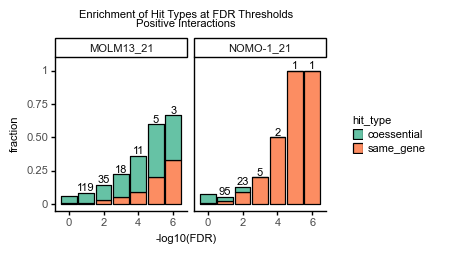

<ggplot: (8781106982641)>

In [26]:
day21_gene_residuals = gene_residuals[gene_residuals.condition.str.contains('_21')]
hit_enrichment_pos = get_hit_enrichment(day21_gene_residuals[day21_gene_residuals.pair_z_score > 0], coessentiality_cors)
g=plot_hit_enrichment(hit_enrichment_pos, title = 'Enrichment of Hit Types at FDR Thresholds\nPositive Interactions')
g

In [27]:
g.save('../figures/coes_positive_enrichment.pdf', width = 7, height = 4, units='cm')

/Users/pdeweird/.local/share/virtualenvs/hart_lipid_metabolism-R5k7HHRA/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 7.0 x 3.9999999999999996 cm image.
/Users/pdeweird/.local/share/virtualenvs/hart_lipid_metabolism-R5k7HHRA/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../figures/coes_positive_enrichment.pdf


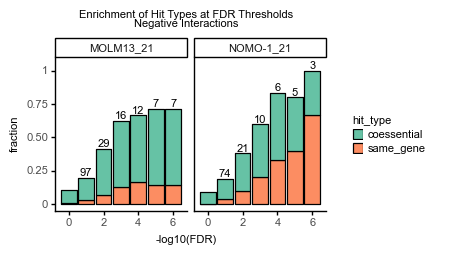

<ggplot: (8781103753608)>

In [28]:
hit_enrichment_neg = get_hit_enrichment(day21_gene_residuals[day21_gene_residuals.pair_z_score < 0], coessentiality_cors)
g=plot_hit_enrichment(hit_enrichment_neg, title = 'Enrichment of Hit Types at FDR Thresholds\nNegative Interactions')
g

In [29]:
g.save('../figures/coess_negative_enrichment.pdf', width = 7, height = 4, units='cm')

/Users/pdeweird/.local/share/virtualenvs/hart_lipid_metabolism-R5k7HHRA/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 7.0 x 3.9999999999999996 cm image.
/Users/pdeweird/.local/share/virtualenvs/hart_lipid_metabolism-R5k7HHRA/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../figures/coess_negative_enrichment.pdf


## Data Outputs

In [30]:
guide_residuals.to_csv('../data/processed/FASN_guide_residuals.csv', index=False)

In [31]:
gene_residuals.to_csv('../data/processed/FASN_gene_residuals.csv', index=False)